In [7]:
import librosa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import keras
import datetime
import seaborn as sns
%matplotlib inline

In [8]:
train_csv = '/home/stephangrs/code/steph-grigors/Speaker_recognition_project/raw_data/train.csv'

In [9]:
df = pd.read_csv(train_csv)

In [10]:
df.head()

,id,file_path,speech,speaker
0,rxr_a0591,train/rxr/arctic_a0591.wav,We are both children together.,rxr
1,rxr_a0403,train/rxr/arctic_a0403.wav,His newborn cunning gave him poise and control.,rxr
2,ljm_a0059,train/ljm/arctic_a0059.wav,His immaculate appearance was gone.,ljm
3,jmk_a0134,train/jmk/arctic_a0134.wav,He obeyed the pressure of her hand.,jmk
4,rms_b0067,train/rms/arctic_b0067.wav,Below him the shadow was broken into a pool of...,rms


In [11]:
df.speaker.value_counts()

awb    910
rms    906
aew    906
ksp    906
clb    906
slt    906
bdl    905
lnh    905
jmk    891
rxr    533
ljm    474
ahw    474
slp    474
fem    474
eey    474
gka    474
axb    474
aup    474
Name: speaker, dtype: int64

In [12]:
pip install librosa
pip install wit


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [14]:
filename = '/home/stephangrs/code/steph-grigors/Speaker_recognition_project/raw_data/train/aew/arctic_a0003.wav'

In [15]:
data, sample_rate = librosa.load(filename)

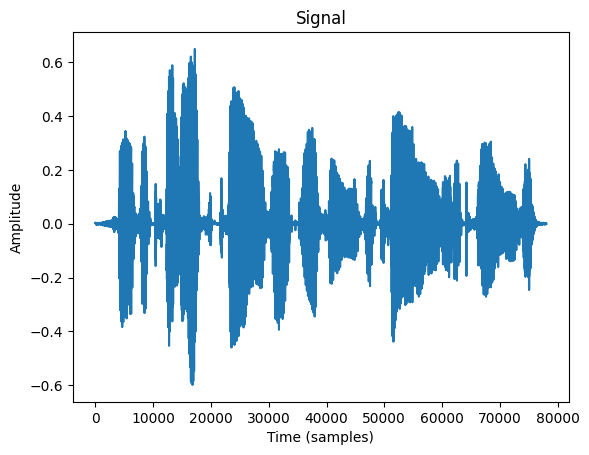

In [16]:
plt.plot(data);
plt.title('Signal');
plt.xlabel('Time (samples)');
plt.ylabel('Amplitude');

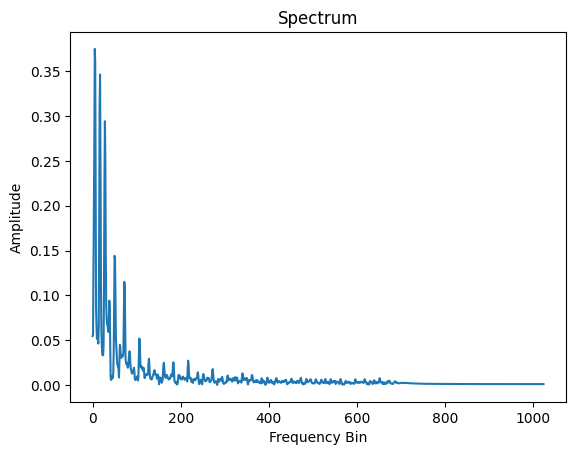

In [17]:
n_fft = 2048
ft = np.abs(librosa.stft(data[:n_fft], hop_length = n_fft+1))
plt.plot(ft);
plt.title('Spectrum');
plt.xlabel('Frequency Bin');
plt.ylabel('Amplitude');

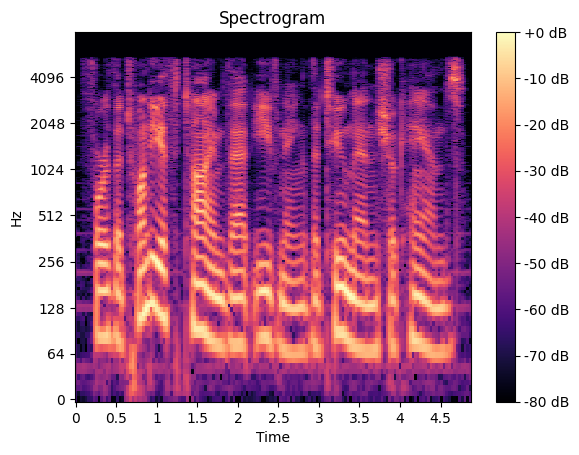

In [21]:
spec = np.abs(librosa.stft(data, hop_length=512))
spec = librosa.amplitude_to_db(spec, ref=np.max)
spec.shape
librosa.display.specshow(spec, sr=16000, x_axis='time', y_axis='log');
plt.colorbar(format='%+2.0f dB');
plt.title('Spectrogram');

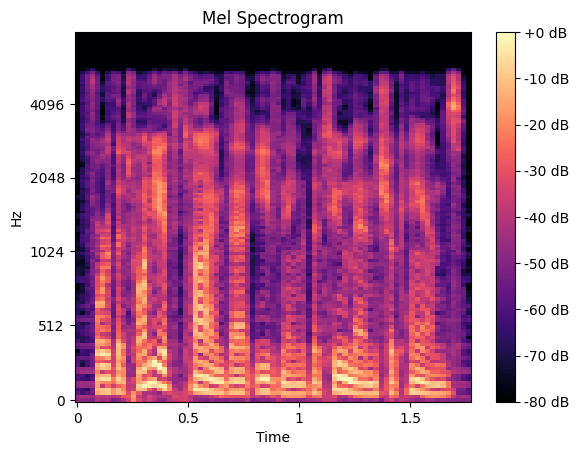

In [27]:
mel_spect = librosa.feature.melspectrogram(y=data, sr=16000, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');
plt.title('Mel Spectrogram');
plt.colorbar(format='%+2.0f dB');